# Regressão Linear

Regressão Lineal é uma equação para modelação de relacionamento entre variáveis.

Se faz necessário variáveis numéricas.

In [3]:
import pandas as pd

base_casa = pd.read_csv("/content/USA_Housing.csv", sep = ",")
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# verificar nulos

base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
%pip install plotply
%pip install cufflinks
%pip install chart-studio

ERROR: Could not find a version that satisfies the requirement plotply (from versions: none)
ERROR: No matching distribution found for plotply
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

fig = px.box(base_casa, x="Avg. Area Income")
fig.update_traces(line_color="blue")

In [16]:
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [19]:
base_casa = base_casa.rename(columns={'Avg. Area Income': 'Avg_Area_Income', 'Avg. Area House Age':'Avg_Area_House_Age', 'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms', 'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms', 'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedroomms', 'Area Population':'Area_Population'})
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedroomms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
# Eliminando uma coluna da base. Colocamos "1" para sinalizar a remoção de uma coluna da base original, e "0" para remoção de linha da base original

base_casa.drop(["Address"], axis=1, inplace=True)
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedroomms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# Análises Estatísticas


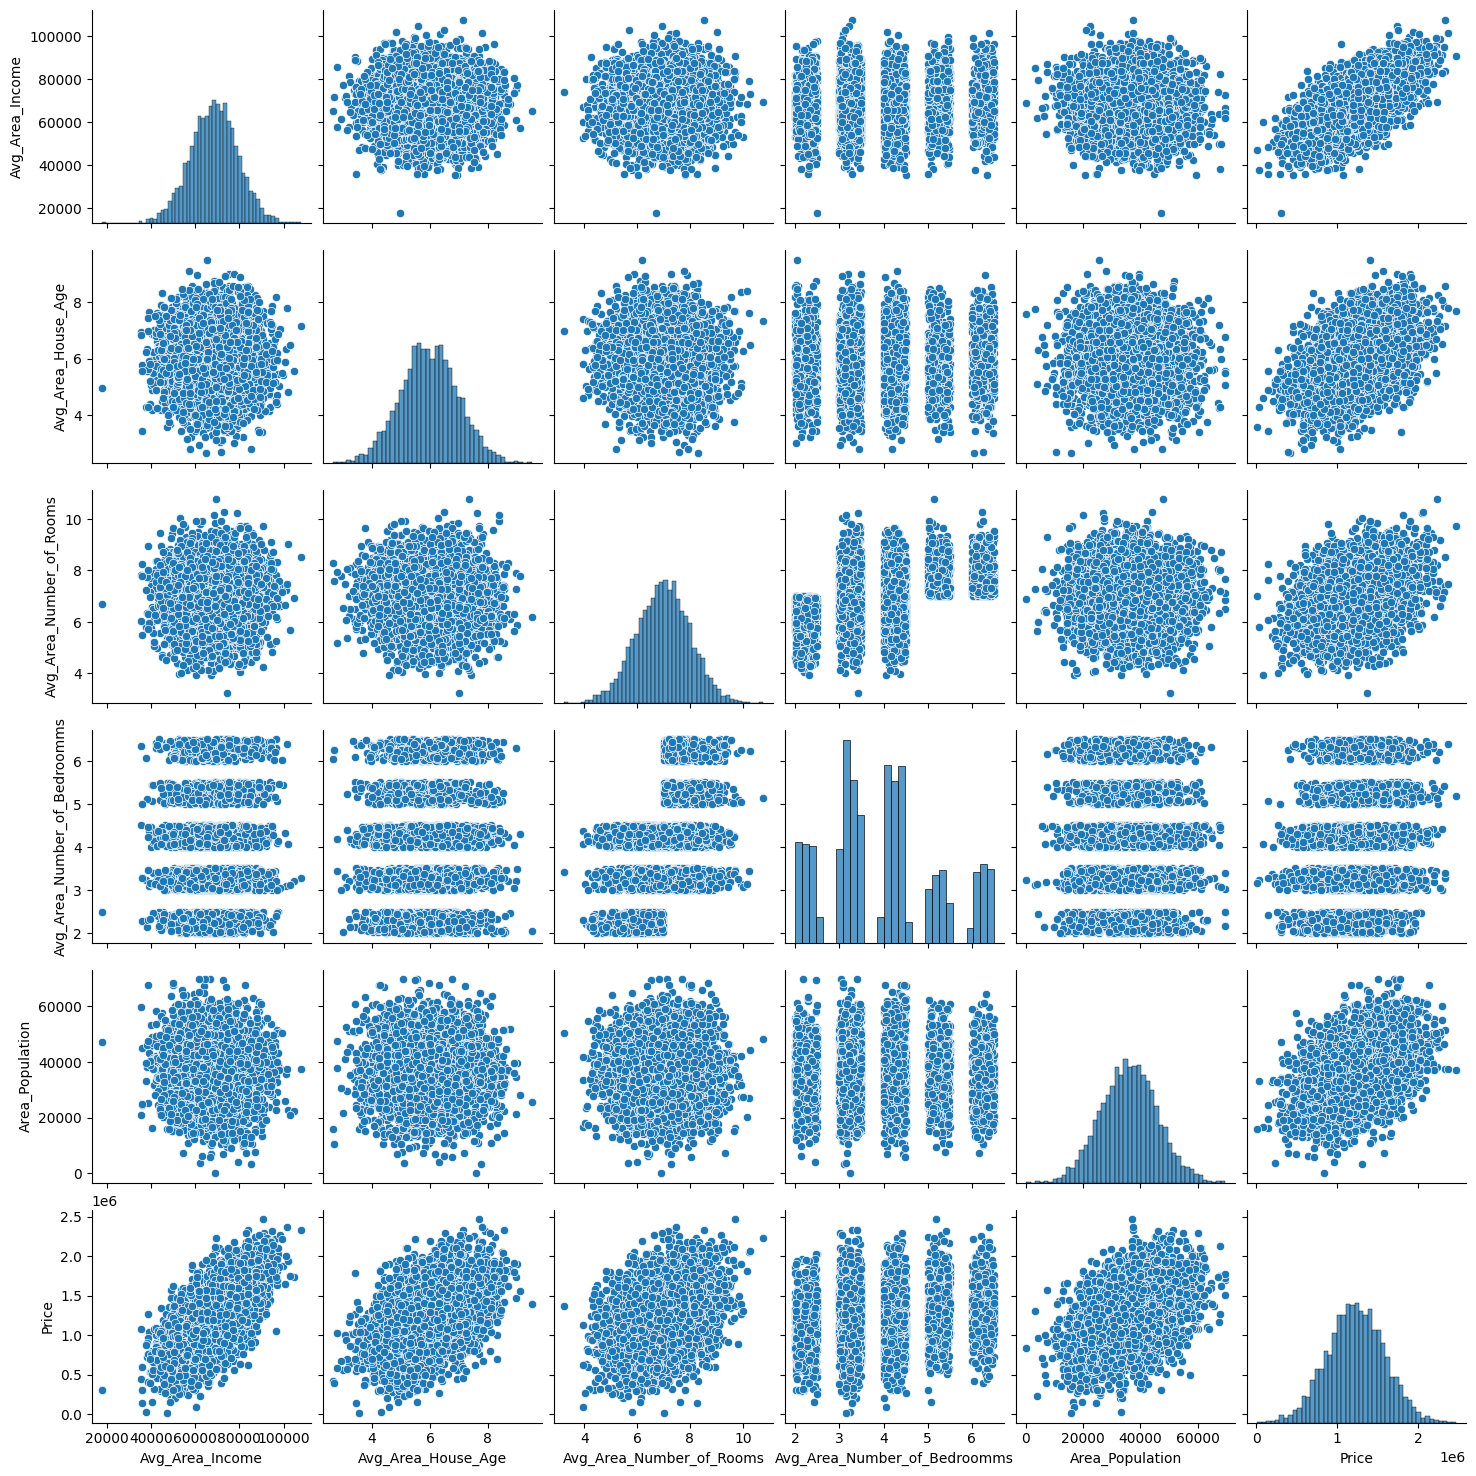

In [24]:
import seaborn as sns

sns.pairplot(base_casa)

# mostra a correção entre as colunas do DataSet

# Quando o eixo y cresce, o eixo x cresce. Ou seja, quanto maior a área construída, maior é o preço, por exemplo.

In [27]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedroomms', 'Area_Population', 'Price'],
      dtype='object')

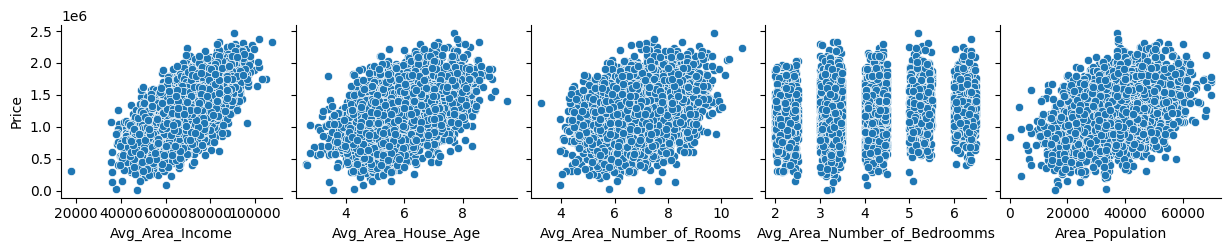

In [30]:
# comparação de variáveis somente com a variável preço

sns.pairplot(base_casa, x_vars=['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedroomms', 'Area_Population'], y_vars= 'Price')

In [31]:
# verificar a correlação, onde se estiver próxima a 1, maior a chance de uma variável explicar a outra.
# Correlação positiva: as duas variáveis aumenta
# Correlação negativa: quando uma sobe, a outra variável diminui

base_casa.corr()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedroomms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedroomms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

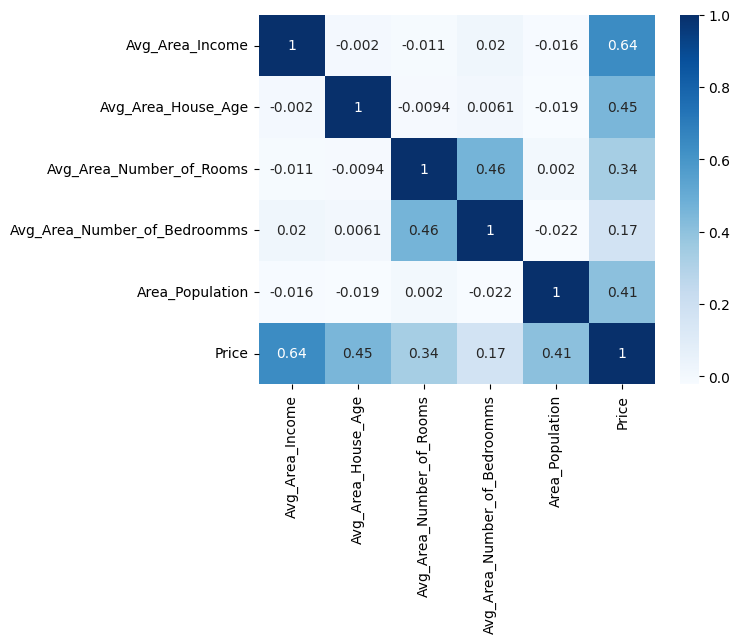

In [37]:
# Uma forma visual de visualizar isso, é através do mapa de calor.

sns.heatmap(base_casa.corr(), cmap="Blues", annot=True)

<Axes: xlabel='Price', ylabel='Count'>

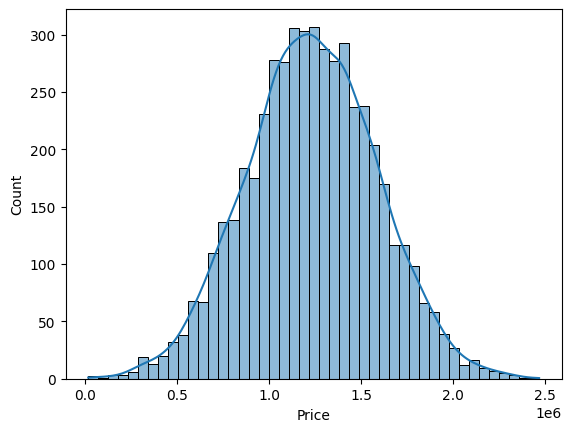

In [38]:
sns.histplot(base_casa["Price"], kde=True)

# distribuição dos preços, normal, sem muita dispersão

In [42]:
# Separação das variavéis x (explicativas) e y (variável resposta)

x =base_casa[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedroomms', 'Area_Population']]
y =base_casa[['Price']]



# Treinamento do modelo

O modelo será treinado e avaliado e será avaliada a possibilidade de se fazer previsão da base de treino. Por fim, um gráfico será plotado para representar a comparação dos valores previstos e valores reais, analisando o desempenho do modelo.

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_teste, y_train, y_teste = train_test_split(x, y, train_size=0.7, random_state=42)
# Treinamento do modelo

In [45]:
print(x_train.shape)
print(x_teste.shape)
print(y_train.shape)
print(y_teste.shape)
#verificando o tamanho do modelo

(3500, 5)
(1500, 5)
(3500, 1)
(1500, 1)


# Treinar o modelo

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train) # treinando

LinearRegression()

In [47]:
# predição na base de teste

y_pred = lm.predict(x_teste)

In [48]:
# importação das métricas
# Quanto maior o score, maior é a precisão do modelo.
# y_teste seria o resultado real, na base
# y_pred seria a predição, onde sendo menor o erro, maior é o r quadrado
from sklearn.metrics import r2_score
r = r2_score(y_teste, y_pred)


In [52]:
import matplotlib.pyplot as plt

In [49]:
print("r_quadrado", r)
# sempre importar a matplotlib antes
# o valor vai até 1, identificando a linearidade

r_quadrado 0.914681849875402


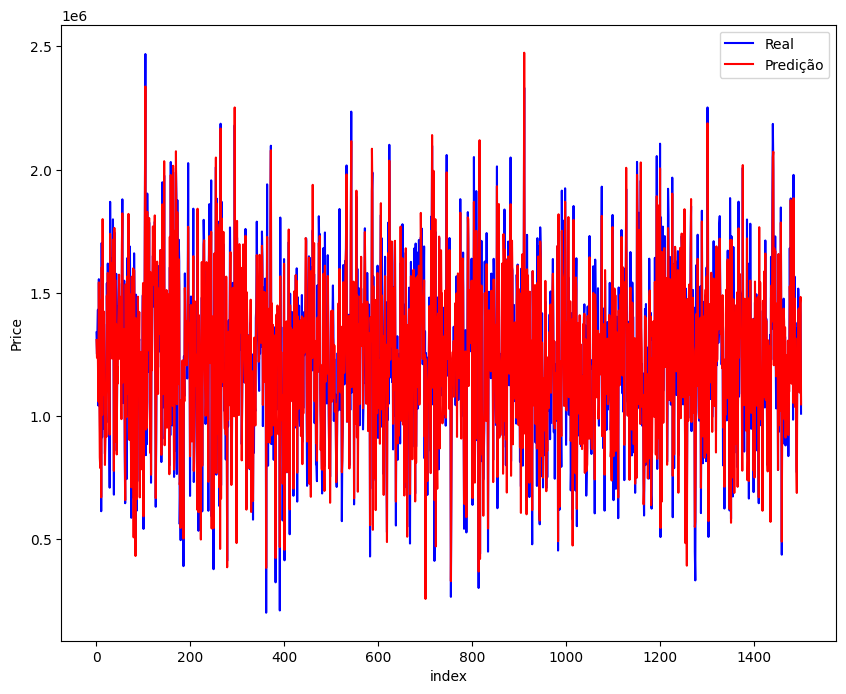

In [55]:
c = [ i for i in range(1, 1501, 1)]

fig = plt.figure(figsize=(10,8))

plt.plot(c, y_teste, color="blue", label="Real")
plt.plot(c, y_pred, color="red", label="Predição")
plt.xlabel("index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [56]:
base_casa.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedroomms', 'Area_Population', 'Price'],
      dtype='object')

In [57]:
# premissa do professor
# definindo premissas
Avg_Area_Income = 50
Avg_Area_House_Age = 30
Avg_Area_Number_of_Rooms = 7
Avg_Area_Number_of_Bedroomms = 5
Area_Population = 200
entrada = [[Avg_Area_Income, Avg_Area_House_Age, Avg_Area_Number_of_Rooms, Avg_Area_Number_of_Bedroomms, Area_Population]]
lm.predict(entrada)[0]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])